In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df_raw = pd.read_excel("/content/drive/MyDrive/ProgramasTFM/Tabla_MLR.xlsx", sheet_name='Filtrados', skiprows=2)

df = df_raw.drop(["MUESTRA", "Fecha", "RENDIMIENTO", "FILM_SECADO", "FILM_LAVADO", "ALCALINIDAD", "RESISTENCIA"], axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
Entrecruzante = df["CL"]
Fotoiniciador = df["PI"]
Goma = df["GOMA"]
Catalizador = df["CATALIZADOR"]
Luz = df["LUZ"]

In [21]:
#modelo con entrecruzante
datos_nuevos = pd.DataFrame({"Crosslinker" : Entrecruzante, "Photoinitiator" : Fotoiniciador, "Gum": Goma, "Catalyst" : Catalizador, "UV light" : Luz})

#modelo sin entrecruzante
#datos_nuevos = pd.DataFrame({"Photoinitiator" : Fotoiniciador, "Gum": Goma, "Catalyst" : Catalizador, "UV Light" : Luz})

coc = df["COCIENTE_LAVADO"]
X_train, X_test, y_train, y_test = train_test_split(datos_nuevos, coc, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor(n_estimators=100)
model.fit(datos_nuevos, coc)

RandomForestRegressor()

In [24]:
importances = model.feature_importances_
features = datos_nuevos.columns

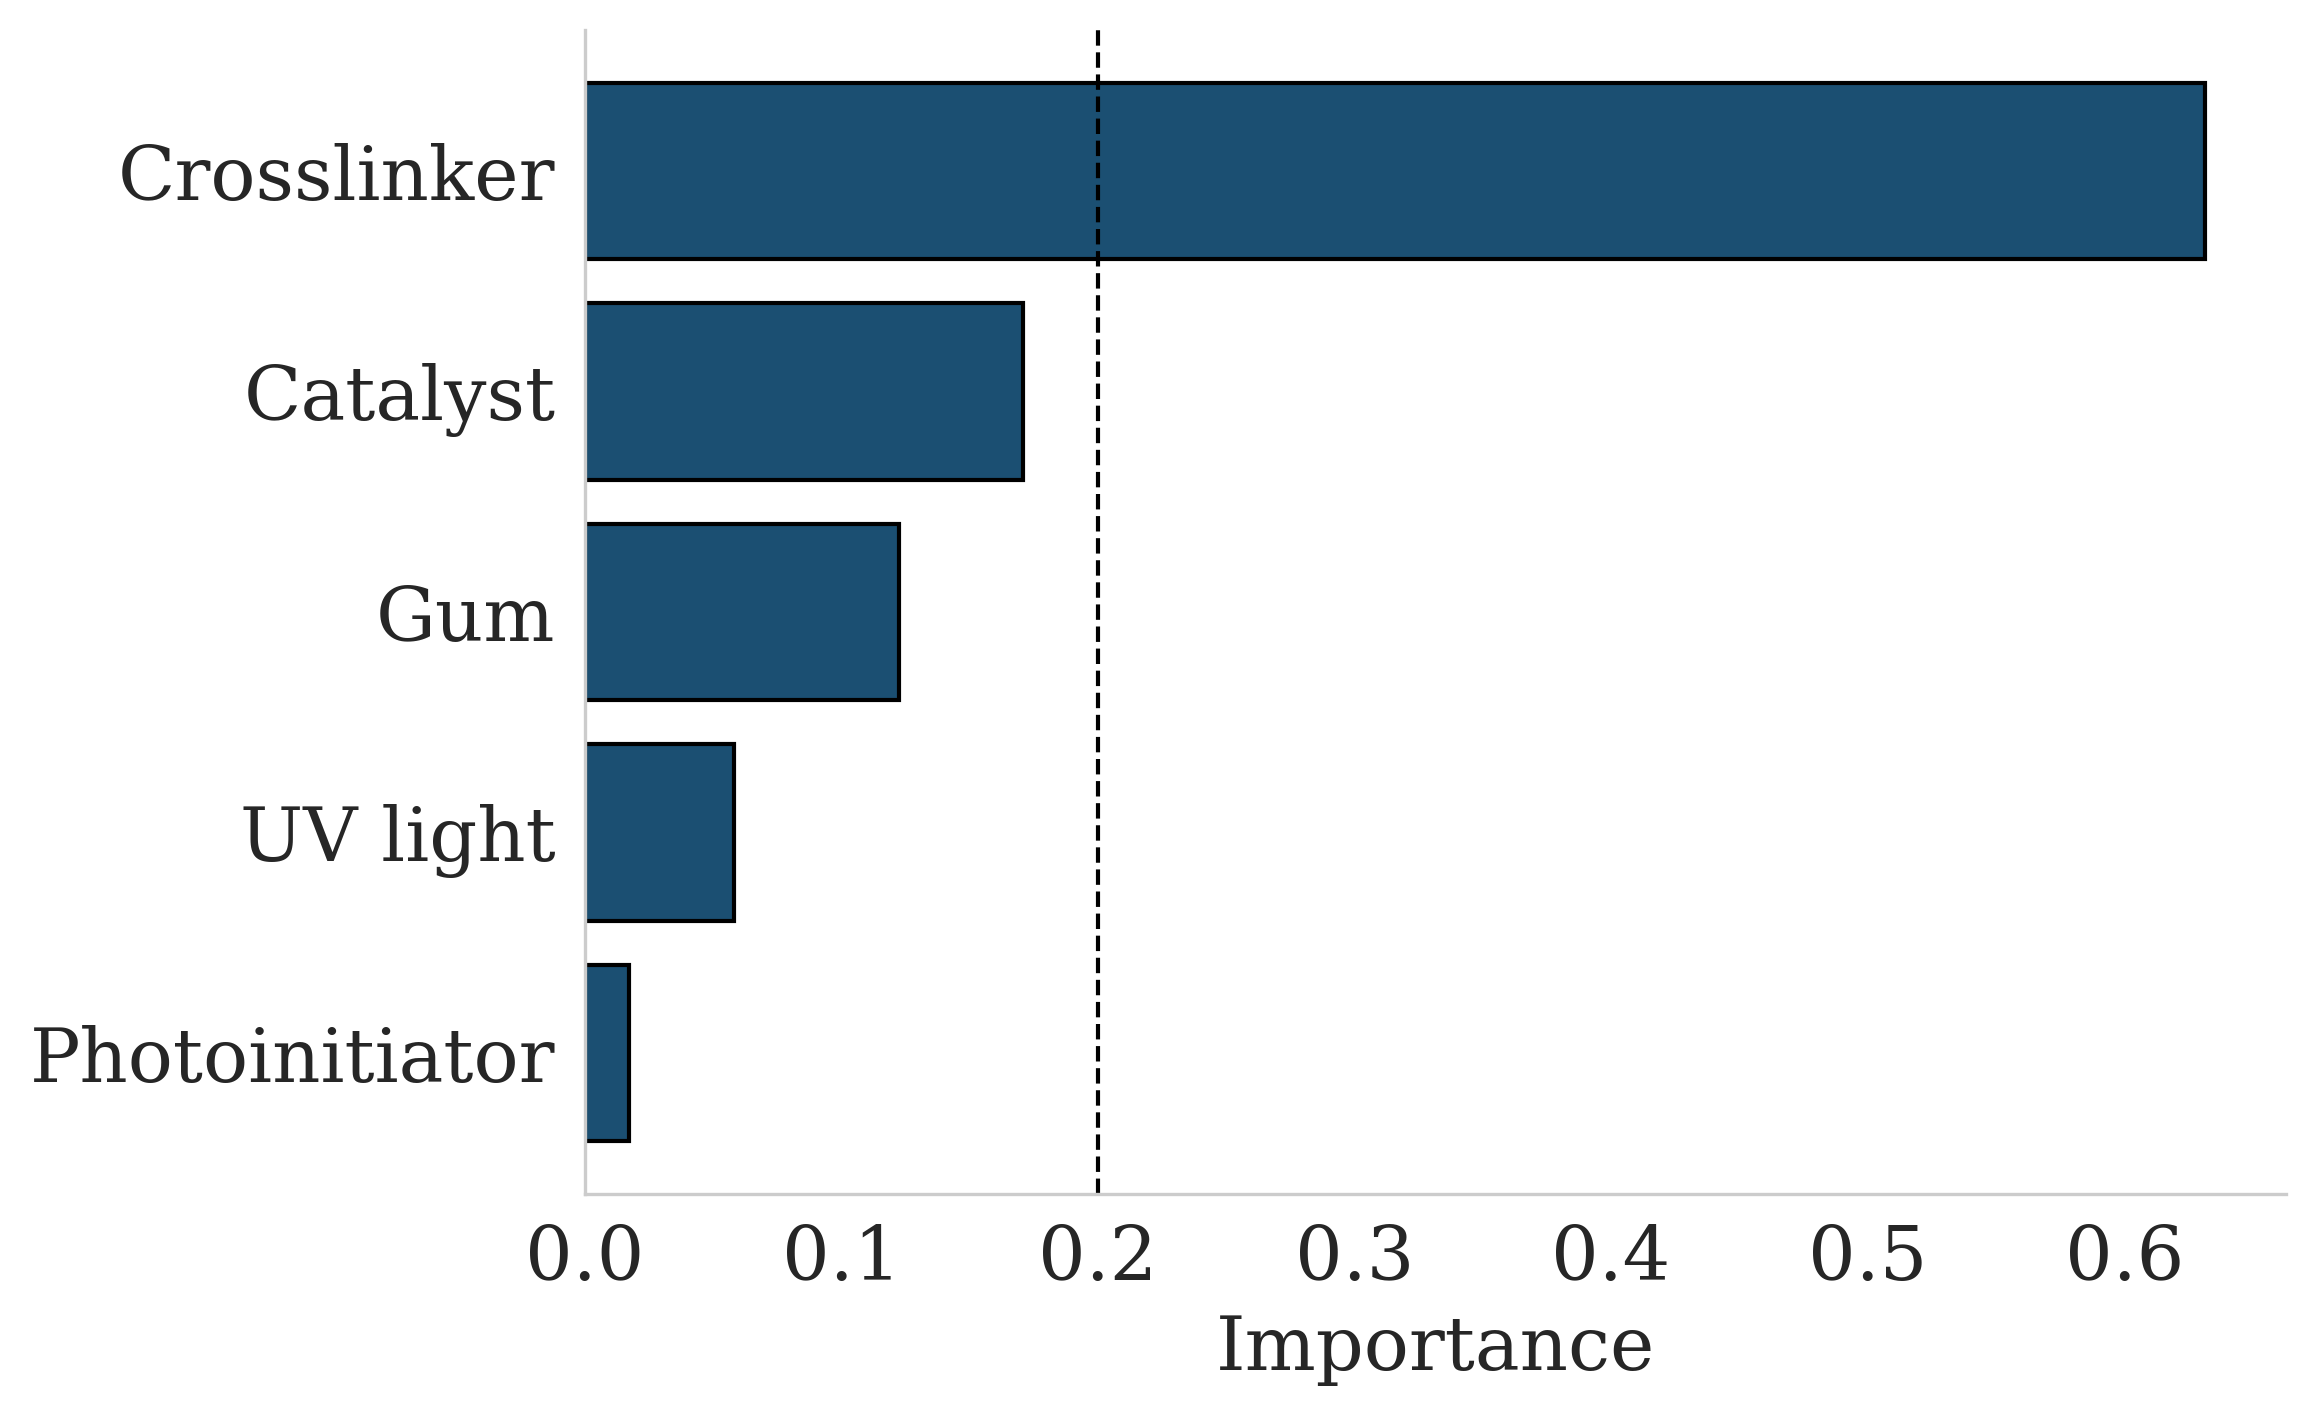

In [27]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'lines.linewidth': 1.5,
    'figure.dpi': 300,
    'pdf.fonttype': 42,
})

available_fonts = [f.name for f in font_manager.fontManager.ttflist]
if 'Times New Roman' in available_fonts:
    plt.rcParams['font.family'] = 'Times New Roman'
else:
    mpl.rcParams['font.family'] = 'serif'

df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(
    df_importance['Feature'],
    df_importance['Importance'],
    color='#1B4F72',
    edgecolor='black'
)

threshold = 1 / df_importance.shape[0]
ax.axvline(x=threshold, color='black', linestyle='--', linewidth=1)

ax.set_xlabel('Importance', fontsize=18)
#ax.set_title('Feature Importance - Random Forest', fontsize=18, pad=12)

ax.tick_params(axis='both', labelsize=18)
ax.grid(False)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()

plt.savefig("feature_importance_rf_CL.png", dpi=600)

plt.show()


In [26]:
import numpy as np

importance_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(importance_df)

         Variable  Importancia
0     Crosslinker     0.631454
3        Catalyst     0.170821
2             Gum     0.122384
4        UV light     0.058179
1  Photoinitiator     0.017162
